In [21]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In this project, I own a fake digital music library and I need to decide which new artists and albums to purchase for my store. I will be using SQL queries integrated with Python to analyze and visualize the data.

My first steps are to define functions that will integrate SQL with Python. These will help me run my upcoming queries faster.

In [22]:
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

In [23]:
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        return conn.execute(c)

In [24]:
def show_tables():
    q = "SELECT name, type FROM sqlite_master WHERE type IN ('table','view')"
    return run_query(q)

In [25]:
print(show_tables())

              name   type
0            album  table
1           artist  table
2         customer  table
3         employee  table
4            genre  table
5          invoice  table
6     invoice_line  table
7       media_type  table
8         playlist  table
9   playlist_track  table
10           track  table


I need to decide which three, out of four, artists to purchase for my music library:

  
Regal - Hip-Hop

Red Tone - Punk

Meteor and the Girls - Pop

Slim Jim Bites - Blues


I will write a query to discover which genres sell the most tracks in the USA, then create a visualization of that data with pandas. I will choose three albums to purchase for my store based the best selling genres.

In [26]:
q = "SELECT * FROM genre"
genres = run_query(q)
print(genres)

    genre_id                name
0          1                Rock
1          2                Jazz
2          3               Metal
3          4  Alternative & Punk
4          5       Rock And Roll
5          6               Blues
6          7               Latin
7          8              Reggae
8          9                 Pop
9         10          Soundtrack
10        11          Bossa Nova
11        12      Easy Listening
12        13         Heavy Metal
13        14            R&B/Soul
14        15   Electronica/Dance
15        16               World
16        17         Hip Hop/Rap
17        18     Science Fiction
18        19            TV Shows
19        20    Sci Fi & Fantasy
20        21               Drama
21        22              Comedy
22        23         Alternative
23        24           Classical
24        25               Opera


In [27]:
q = '''
    WITH usa_tracks_sold AS
    (
    SELECT i.*
    FROM invoice_line i
    INNER JOIN invoice iv ON i.invoice_id = iv.invoice_id
    WHERE iv.billing_country = 'USA'
    )
    
    SELECT 
        g.name genre, 
        COUNT(uts.invoice_line_id) quantity_sold,
        CAST(COUNT(uts.invoice_line_id) AS float) / 
        (SELECT COUNT(*) FROM usa_tracks_sold) * 100 percentage_sold
    FROM usa_tracks_sold uts
    INNER JOIN track t ON uts.track_id = t.track_id 
    INNER JOIN genre g ON t.genre_id = g.genre_id 
    GROUP BY 1 ORDER BY 2 desc
    LIMIT 10;
'''

top_genres = run_query(q)
print(top_genres)

                genre  quantity_sold  percentage_sold
0                Rock            561        53.377735
1  Alternative & Punk            130        12.369172
2               Metal            124        11.798287
3            R&B/Soul             53         5.042816
4               Blues             36         3.425309
5         Alternative             35         3.330162
6               Latin             22         2.093245
7                 Pop             22         2.093245
8         Hip Hop/Rap             20         1.902950
9                Jazz             14         1.332065


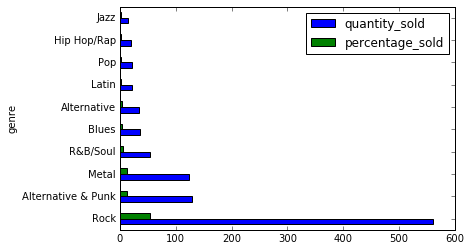

In [28]:
top_genres.plot.barh(x='genre')

This graph represents the top ten genres sold in the USA from my store in total quantity sold and percentages.

Based on this data, I will choose the Punk band (Red Tone), Blues band (Slim Jim Bites), and Pop band (Meteor and Girls) to purchase for my store. 

I am passing on the hip-hop group, but hip-hop is very close behind pop in popularity in the USA. However, one could still make the case for selecting the hip-hop group if trends anticipate that hip-hop will surpass one of the other genres in the future.

Next I will be analyzing the sales of our support reps and looking for any correlations. I will write an SQL query that concatenate's columns and joins tables to gather the data that I need.

In [29]:
support_reps = '''
SELECT 
    e.first_name || " " || e.last_name employee_name,
    SUM(i.total) sales,
    COUNT(c.customer_id) total_customers,
    e.hire_date,
    c.city,
    c.state
FROM employee e
INNER JOIN customer c ON e.employee_id = c.support_rep_id
INNER JOIN invoice i ON c.customer_id = i.customer_id
GROUP BY 1 ORDER BY 2 desc;
'''

sales_reps = run_query(support_reps)
print(sales_reps)

   employee_name    sales  total_customers            hire_date  \
0   Jane Peacock  1731.51              212  2017-04-01 00:00:00   
1  Margaret Park  1584.00              214  2017-05-03 00:00:00   
2  Steve Johnson  1393.92              188  2017-10-17 00:00:00   

            city state  
0         London  None  
1  Mountain View    CA  
2       Edmonton    AB  


Here we can see the total sales assigned to each support rep. One possible interpretation of the data is that hire date correlates with higher sales, as the more senior reps have more sales than the junior. It makes sense that an employee who worked at a company longer would have had more time to to accumulate sales than a newer employee.

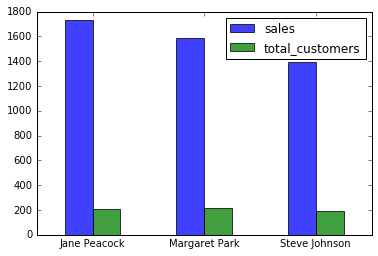

In [30]:
sales_reps.set_index(["employee_name"], inplace=True)
sales_reps.plot(kind='bar',alpha=0.75, rot=0)
plt.xlabel("")
plt.show()

This visualization is another way to observe the data. We can see the total sales per support rep, possibly correlating with their hire date. Total customers assigned per rep, however, is fairly even across all three agents, with Steve Johnson, the newest agent, having the least amount of customers and sales. 

Total customer assigned does not appear to correlate with higher sales, although the more senior support reps probably have customers assigned that have been with them longer, resulting in more sales for the support rep over time.

THIS PROJECT IS ONGOING. TO BE CONTINUED.